In [800]:
import os
from postProcessing.importData import *


#Insert name here
NAME = "J0524pin.h5"
#################
NAME = NAME.split("/")
if 'simulations' in NAME:
    NAME.remove("simulations")
    NAME="/".join(NAME)
if isinstance(NAME, list):
    NAME = "/".join(NAME)
NAME = NAME.split(".")
if "h5" in NAME:
    NAME.remove("h5")
    NAME=".".join(NAME)
if isinstance(NAME, list):
    NAME = ".".join(NAME)
    


PATH = "./simulations/" + NAME
if(os.path.isdir(NAME)):
    print("Enter a valid file name")
else:
    PATH += ".h5"
    data = dataProcessing(PATH)
data.printHamiltonian()



b'float'
SELF CONSISTENT [GAUGE, HARTREE]  ==> [True, False]
The current simulation does not export HoppingFields
Note: Magnetic free energy density not added to free energy density because defined on plaquettes
COMMON VARIABLES:
T    ==>  0.22987371683120728
q    ==>  0.25
Bext ==>  (0., 0., 0.)
Emax ==>  22.420000076293945
[Component 1, Component 2]
t_x  ==>  [1.+0.j 1.+0.j]
t_y  ==>  [1.+0.j 1.+0.j]
mu   ==>  [0. 0.]
h    ==>  [0. 0.]
Coupling matrix V:
  3.2  -0.01  
-0.01    3.2  
Inverse of V:
   0.312503  0.000976572  
0.000976572     0.312503  
detV ==> 10.239900305180251


In [801]:
file_name = NAME

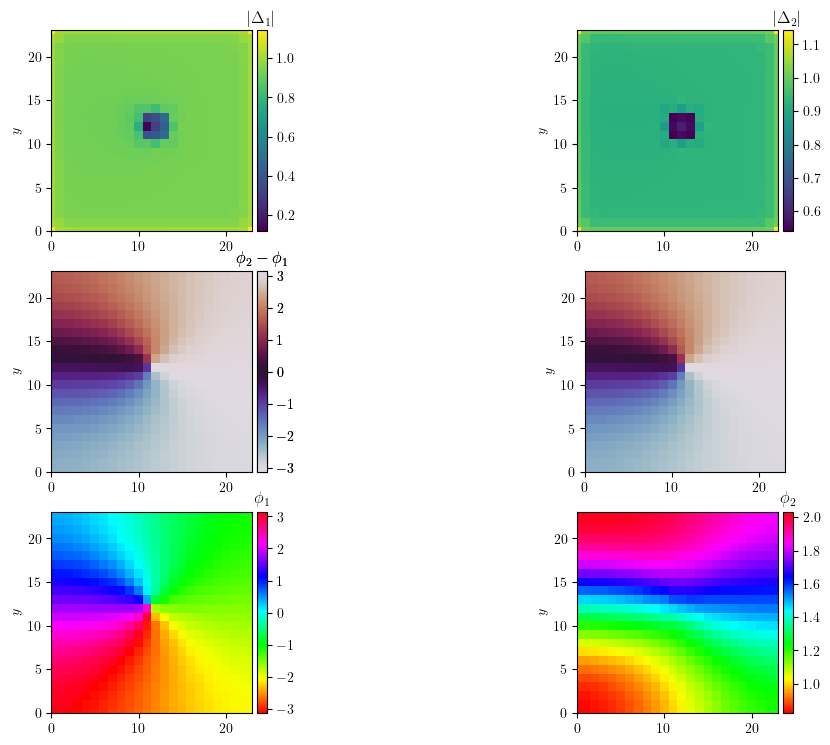

In [802]:
data.plotDelta(save=file_name+'delta')

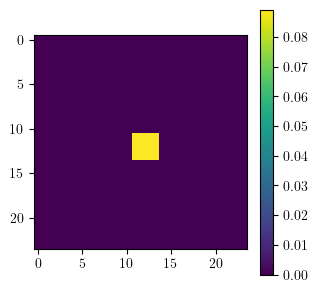

In [803]:
plt.imshow(data.mod/data.hamiltonian.Emax) 
plt.colorbar()
plt.savefig(file_name + 'mu.pdf')

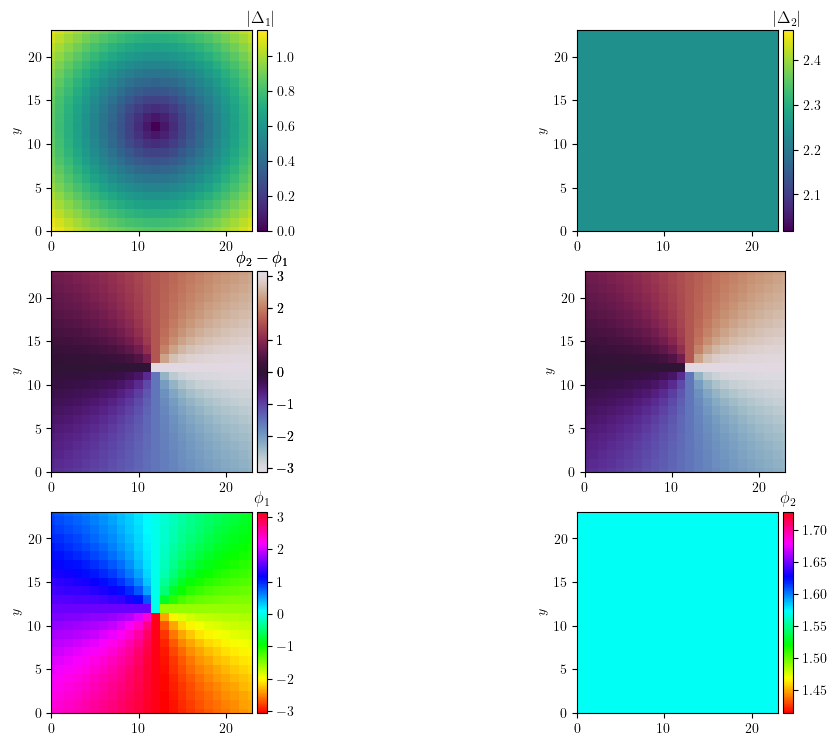

In [804]:
data.plotInitialGuess(save=file_name+'ig')

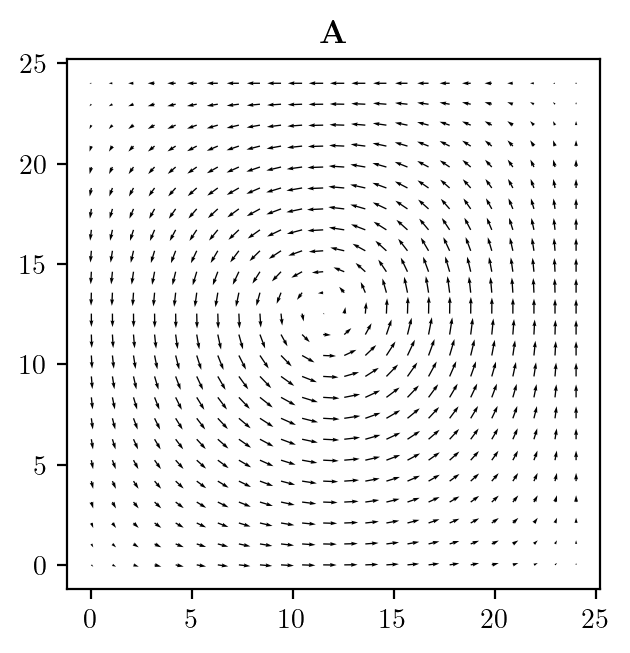

In [805]:
data.plotA()

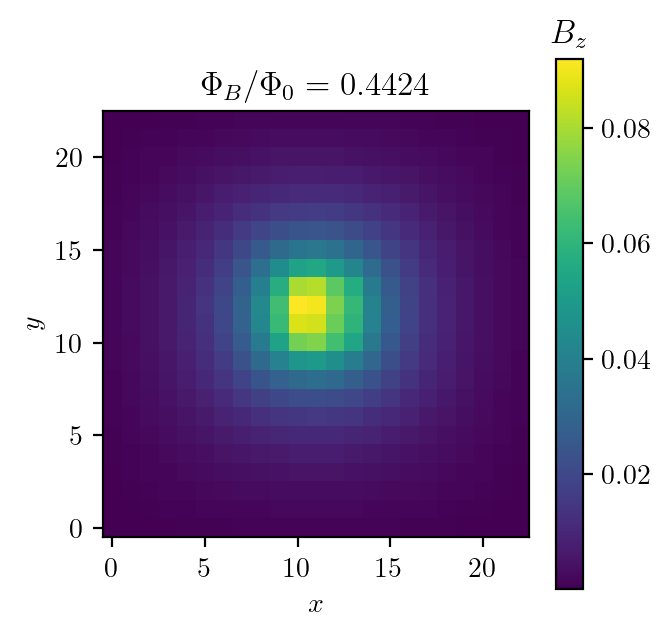

In [806]:
data.plotB(save=file_name+'B')

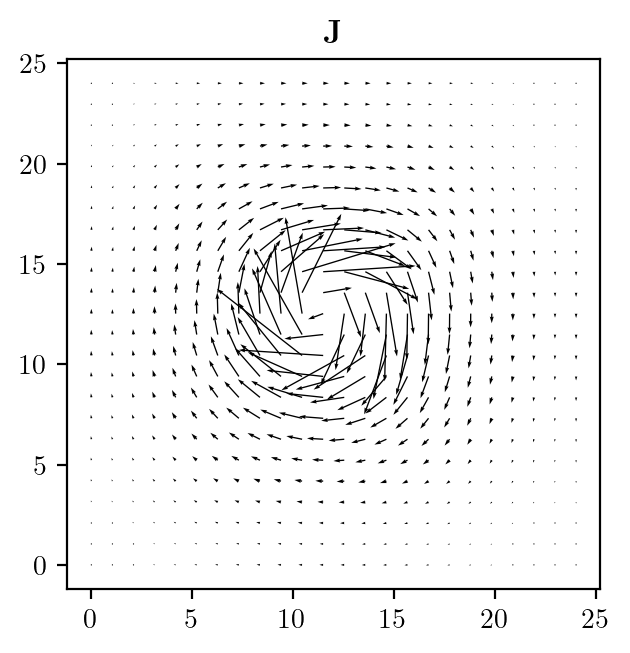

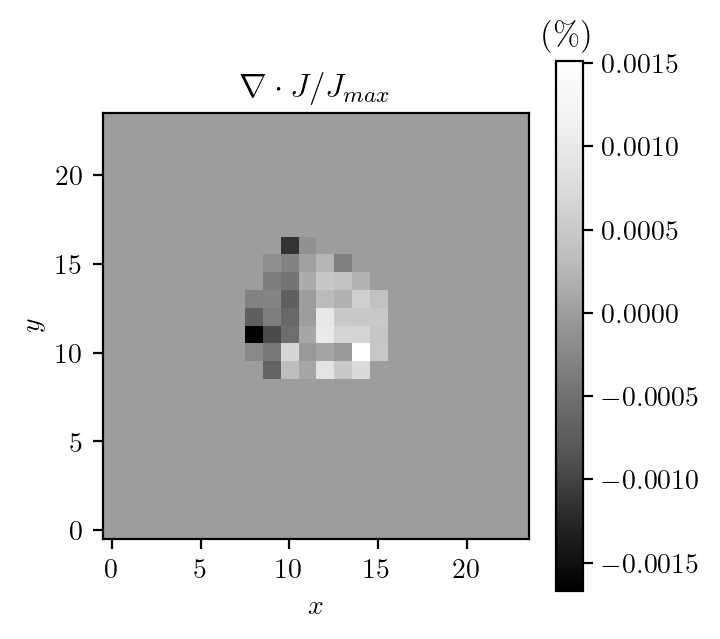

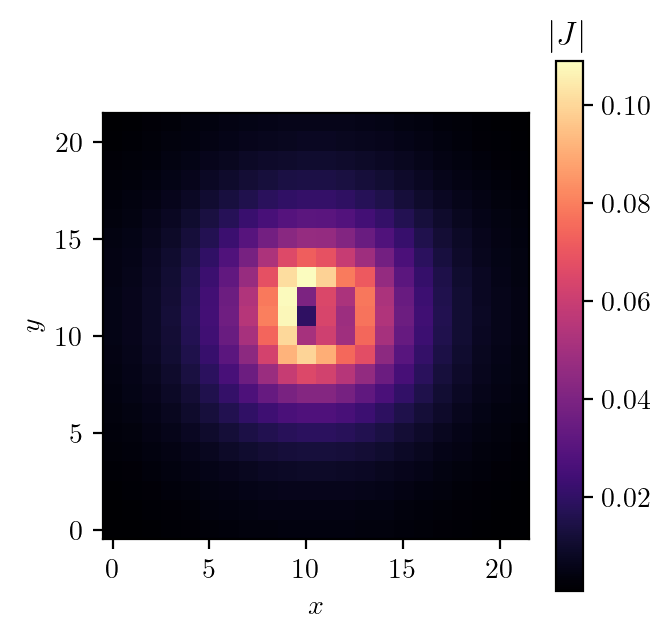

In [807]:
data.plotJ(0.002, save=file_name+'J')

In [808]:
data.FreeEnergy

-10176.018229909601